# Design of a Low-Power 1.8 V CAN Transceiver for Ultra-Low-Power Devices with Open Source Tools

SPDX-License-Identifier: Apache-2.0

| Name | Affiliation | IEEE Member | SSCS Member | Email ID |
|------|------------|------------|------------|----------|
| Wu Chenrui | University of Malaya | No | No | 23074113@siswa.um.edu.my |
| Lim You Heng | University of Malaya | No | No | youheng7185@gmail.com |

# Introduction
## Project Overview
This project presents the design of a low-power Controller Area Network (CAN) transceiver optimized for 1.8 V logic-level devices, such as ultra-low-power microcontrollers. The transceiver is a simplified prototype derived from a broader concept of an energy-harvesting CAN interface.

While the original goal was to develop a self-powered transceiver that harvested energy from the bus differential voltage, this prototype focuses on the core communication circuitry, ensuring proper CAN signal levels, differential driving, and reception behavior under reduced voltage operation (1.8 V supply). This serves as a proof-of-concept stage toward the complete energy-harvesting system.

## Design Objectives
The primary objective of this design is to facilitate the easy and economical integration of low-power embedded devices into existing CAN infrastructures. Key goals include:

- Operate reliably using a 1.8 V supply while interfacing with a standard 5 V CAN bus.
- Drive and sense valid differential voltage levels across a 60 Ω termination.
- Consume minimal power suitable for integration with energy-limited sensor nodes.
- Maintain CAN-compatible logic behavior (dominant/recessive states) for a low-voltage microcontroller interface.

## Specifications
The designed transceiver was successfully simulated in Xschem using SkyWater SKY130 PDK transistor-level models. The simulation verified that the transceiver correctly produces standard CAN bus differential voltages using a 1.8 V supply and minimal CMOS components.

Key simulation results:

- Dominant (logical 0) state:
    - Differential voltage, Vdiff = CAN_H – CAN_L ≈ 1.4 V
- Recessive (logical 1) state:
    - Differential voltage, Vdiff ≈ 0 V

These results closely align with the ISO 11898 physical layer requirement, which specifies a differential voltage of at least 1.5 V during the dominant state and near 0 V during recessive. The achieved 1.4 V swing demonstrates that a low-voltage (1.8 V) CMOS implementation can approximate standard CAN signaling using optimized transistor sizing.

## Design Methodology
The design focuses on modeling a complete CAN transceiver — including both TX (driver) and RX (receiver) paths — using only essential CMOS components. The architecture was simplified to validate the fundamental operation of a low-power CAN physical layer compatible with 1.8 V logic-level devices such as the STM32L4 microcontroller family.

The transceiver comprises two primary subsystems:

1. Transmit Driver Stage (TX):
    - Implemented using a complementary NMOS–PMOS pair that differentially drives the CAN_H and CAN_L lines.
    - The output transistors were carefully sized to achieve a 1.4 V differential swing across a 60 Ω termination while operating from a 1.8 V supply.
    - This configuration models the dominant and recessive states of the CAN bus with minimal component count.
2. Receive Comparator Stage (RX):
    - A differential sensing circuit that detects the voltage difference between CAN_H and CAN_L and outputs a digital logic level corresponding to the bus state.
    - Designed to operate with 1.8 V logic thresholds for direct interfacing with low-power microcontrollers.
    - The design was verified through transient simulation in Xschem, demonstrating stable transitions between dominant and recessive states, proper differential voltage behavior, and logical consistency between TX and RX signals.

# Tools

All design steps, simulations, and visualizations are performed using open-source tools, fully integrated into the provided Docker environment:

- **KiCad** – for schematic capture and circuit simulation using Ngspice as the backend.
- **xschem** – for transistor-level schematics with the sky130 PDK.
- **Magic** – for layout, DRC checks, and verifying design rules.
- **Ngspice** – for detailed SPICE simulations of the circuits.

The entire design flow is fully reproducible and documented in this notebook, enabling straightforward learning and experimentation without the need to install additional software or dependencies.

### Note

This Jupyter Notebook is intended to run directly inside the provided Docker container, which includes all necessary tools and the Sky130 PDK. No additional `apt` or `pip` installations are required.  
For setup instructions, visit the repository: [https://github.com/iic-jku/IIC-OSIC-TOOLS](https://github.com/iic-jku/IIC-OSIC-TOOLS), and ensure your `~/.bashrc` is updated to switch to the Sky130 PDK environment.

# Principles

## Conventional CAN Transceiver Theory
A conventional CAN transceiver operates as the physical interface between a CAN controller and the differential CAN bus lines (CAN_H and CAN_L).
It converts logic-level transmit (TX) from a MCU or SOC and receive (RX) signals to and from differential voltages that represent the dominant and recessive states on the bus.

- Dominant state (logic 0):
The driver actively drives CAN_H high and CAN_L low, creating a differential voltage (Vdiff = CAN_H – CAN_L) typically around 2 V.

- Recessive state (logic 1):
Both CAN_H and CAN_L are released to a common mode level (≈2.5 V in standard 5 V systems), and Vdiff ≈ 0 V.

Standard CAN transceivers are designed to operate at 5 V or 3.3 V supply levels, ensuring bus compliance with ISO 11898 electrical characteristics. They typically include protection circuits, slope control, and fail-safe biasing, which make them suitable for high-speed automotive and industrial environments.

Here is the simpilified design of conventional CAN transceiver without any circuits protection features:

### Transmit circuit

Here is the simplified block design of Infeneon TLE6251D CAN transceiver:

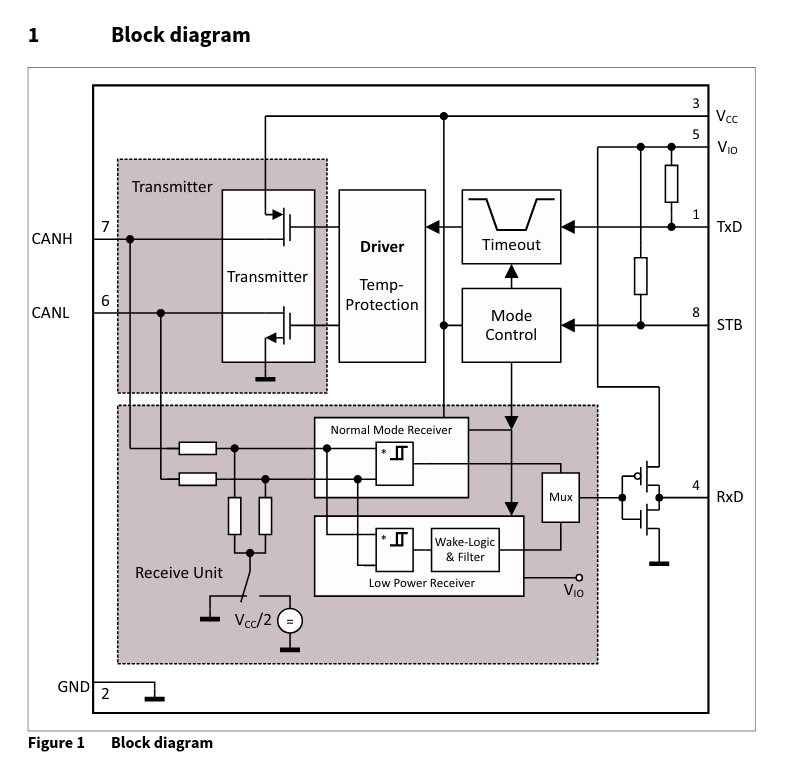

Here is our simplified design of the transmitter part and driver:

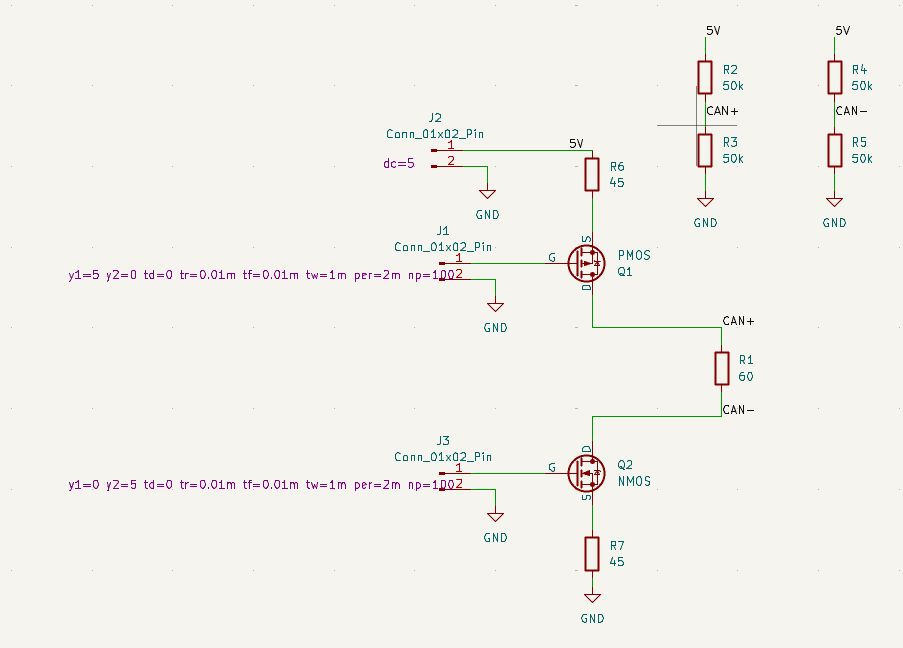

A weak voltage divider is used to bias both CAN+ and CAN– lines at 2.5 V during the recessive state, when both the PMOS and NMOS transistors are in cutoff mode. This ensures that the differential voltage is nearly zero, as required by the CAN standard.

Now, looking at the left side of the circuit, R1 represents the termination resistor specified by the CAN standard. According to the specification, a 120 Ω resistor is placed at each end of the bus. Since the transceiver is effectively in the middle of the network, the total termination resistance across the bus becomes 60 Ω (two 120 Ω resistors in parallel).

During the dominant state, both the PMOS and NMOS are turned on, allowing current to flow through the termination resistor. Based on the standard, the required differential voltage (Vdiff) is 2 V, and applying Ohm’s Law (V = IR) with R = 60 Ω, the circuit must drive approximately 33.3 mA through the resistor to achieve this potential difference.

To determine the values of the resistors before the PMOS and after the NMOS, we again apply V = IR. Given that the R_DS(on) of both transistors is relatively low, we choose 45 Ω resistors to achieve the target node voltages. This results in CAN+ ≈ 3.5 V and CAN– ≈ 1.5 V during the dominant state, creating the desired 2 V differential across the termination resistor.

The PULSE source defines the input signal at the TX pin, which toggles between 0 V and 5 V with a 50% duty cycle and a period of 0.02 ms (0.01 ms per logic state). In a commercial CAN transceiver, the TX signal would typically drive both gates through a dedicated gate driver circuit, reducing stress on the microcontroller’s GPIO pin. However, for simplicity, this design directly connects the TX signal to the PMOS gate, while the NMOS gate receives the inverted version of the same signal.

In summary:

- Recessive state (TX = High): Both MOSFETs are off, and CAN+ and CAN– remain at 2.5 V due to the voltage divider.

- Dominant state (TX = Low): Both MOSFETs conduct, allowing current through the termination resistor and creating a ~2 V differential across CAN+ and CAN–.

There is a simulation results after receiver circuit explanation to prove this.

### Receiver circuit

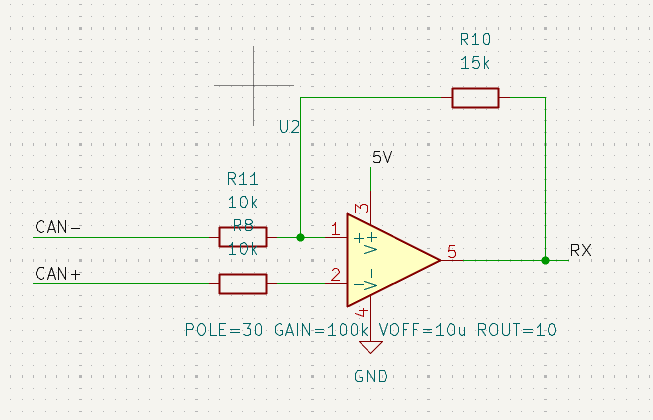

Commercial CAN transmitters usually include proper voltage comparator circuits that have a Schmitt trigger and a dedicated comparator to detect the voltage difference between CAN+ and CAN−. To keep our design simple, we used an operational amplifier as the comparator instead. It outputs a logic low when there is about 1.0 V difference between the two lines, and a logic high when the difference drops below 0.5 V.



In [3]:
## print exported netlist from kicad, modified and moved /usr/share/kicad/symbols/Simulation_SPICE.sp into .cir file
!cat can_ic_5V_all.cir

.title KiCad schematic

* --- Built-in OpAmp model from KiCad (self-contained) ---
* Simple generic model for a single-pole OpAmp
* Parameters are pole frequency, gain, offset, output resistance.
* The output is limited to the supply voltage.
* Author Holger Vogt, Public Domain
.subckt kicad_builtin_opamp in+ in- vcc vee out params: POLE=20 GAIN=20k VOFF=10m ROUT=10
* add offset voltage
  Voff in+ inoff dc {VOFF}
* gain stage with RC pole
  G10 0 int inoff in- 100u
  R1 int 0 {GAIN/100u}
  C1 int 0 {1/(6.28*(GAIN/100u)*POLE)}
* output decoupling, output resistance
  Eout 2 0 int 0 1
  Rout 2 out {ROUT}
* output limited to vee, vcc
  Elow lee 0 vee 0 1
  Ehigh lcc 0 vcc 0 1
  Dlow lee int Dlimit
  Dhigh int lcc Dlimit
  .model Dlimit D N=0.01
.ends kicad_builtin_opamp
* --- End of embedded OpAmp model ---


* --- Device models ---
.model __Q2 VDMOS NCHAN
+           vto=2
+           kp=1.36

.model __Q1 VDMOS PCHAN
+           kp=0.68


* --- Circuit description ---
R11 /CAN- Net-_U2-+

In [4]:
## run ngspice simulation
!ngspice -b can_ic_5V_all.cir


Note: No compatibility mode selected!


Circuit: KiCad schematic

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
/can-                                  2.50004
net-_u2-+_                             2.50008
/can+                                  2.50004
net-_u2--_                             2.50004
xu2.inoff                              2.50007
xu2.int                                2.50013
xu2.2                                  2.50013
/rx                                    2.50013
xu2.lee                                      0
xu2.lcc                                      5
/5v                                          5
net-_j3-pin_1_                               0
net-_q2-s_                         1.13064e-10
/tx                                          5
net-_q1-s_                 

Parsed 530 data points
Time range: 0.000000 to 0.010000 seconds


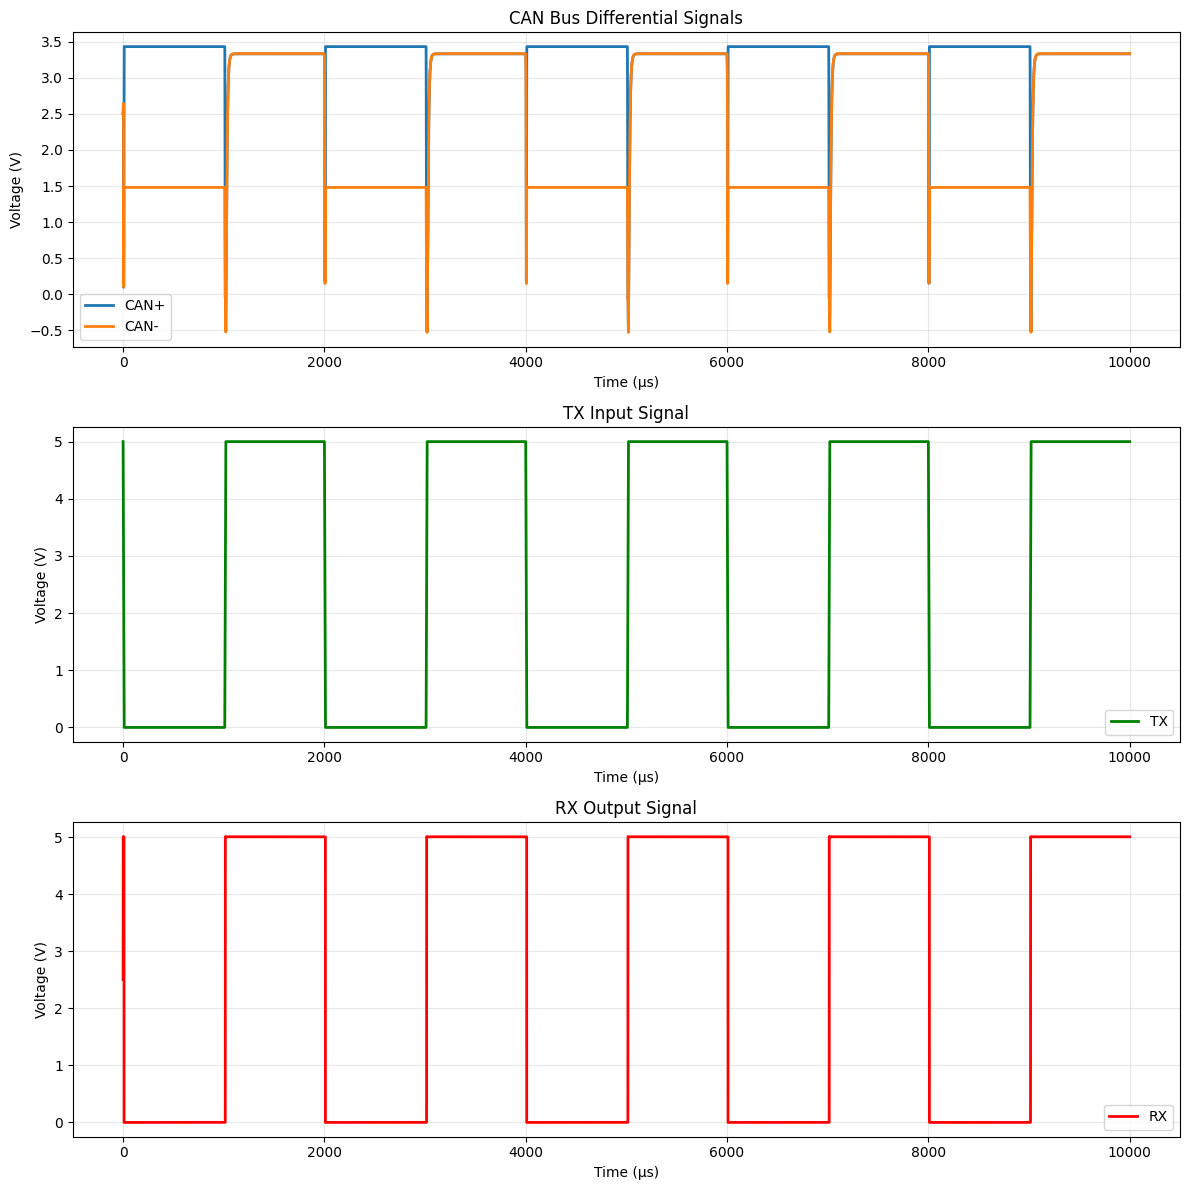

In [5]:
# to show the simulated waveform
import matplotlib.pyplot as plt
import numpy as np

# Parse output
time = []
can_plus = []
can_minus = []
tx = []
rx = []

with open('output.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        if not line or 'Index' in line or '---' in line:
            continue
        
        parts = line.split()
        if len(parts) >= 5:
            try:
                idx = int(parts[0])
                time_val = float(parts[1])
                cp_val = float(parts[2])
                cm_val = float(parts[3])
                tx_val = float(parts[4])
                rx_val = float(parts[5]) if len(parts) > 5 else 0
                
                time.append(time_val)
                can_plus.append(cp_val)
                can_minus.append(cm_val)
                tx.append(tx_val)
                rx.append(rx_val)
            except (ValueError, IndexError):
                continue

print(f"Parsed {len(time)} data points")
if len(time) > 0:
    print(f"Time range: {min(time):.6f} to {max(time):.6f} seconds")

# Plot
if len(time) > 0:
    time_us = np.array(time) * 1e6  # Convert to microseconds
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
    
    # CAN Bus signals
    ax1.plot(time_us, can_plus, label='CAN+', linewidth=2)
    ax1.plot(time_us, can_minus, label='CAN-', linewidth=2)
    ax1.set_xlabel('Time (μs)')
    ax1.set_ylabel('Voltage (V)')
    ax1.set_title('CAN Bus Differential Signals')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # TX signal
    ax2.plot(time_us, tx, label='TX', linewidth=2, color='green')
    ax2.set_xlabel('Time (μs)')
    ax2.set_ylabel('Voltage (V)')
    ax2.set_title('TX Input Signal')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # RX signal
    ax3.plot(time_us, rx, label='RX', linewidth=2, color='red')
    ax3.set_xlabel('Time (μs)')
    ax3.set_ylabel('Voltage (V)')
    ax3.set_title('RX Output Signal')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot. Check output.txt file.")

## Low-Power CAN Transceiver Idea

Here is simplified design of our low power transmitter:

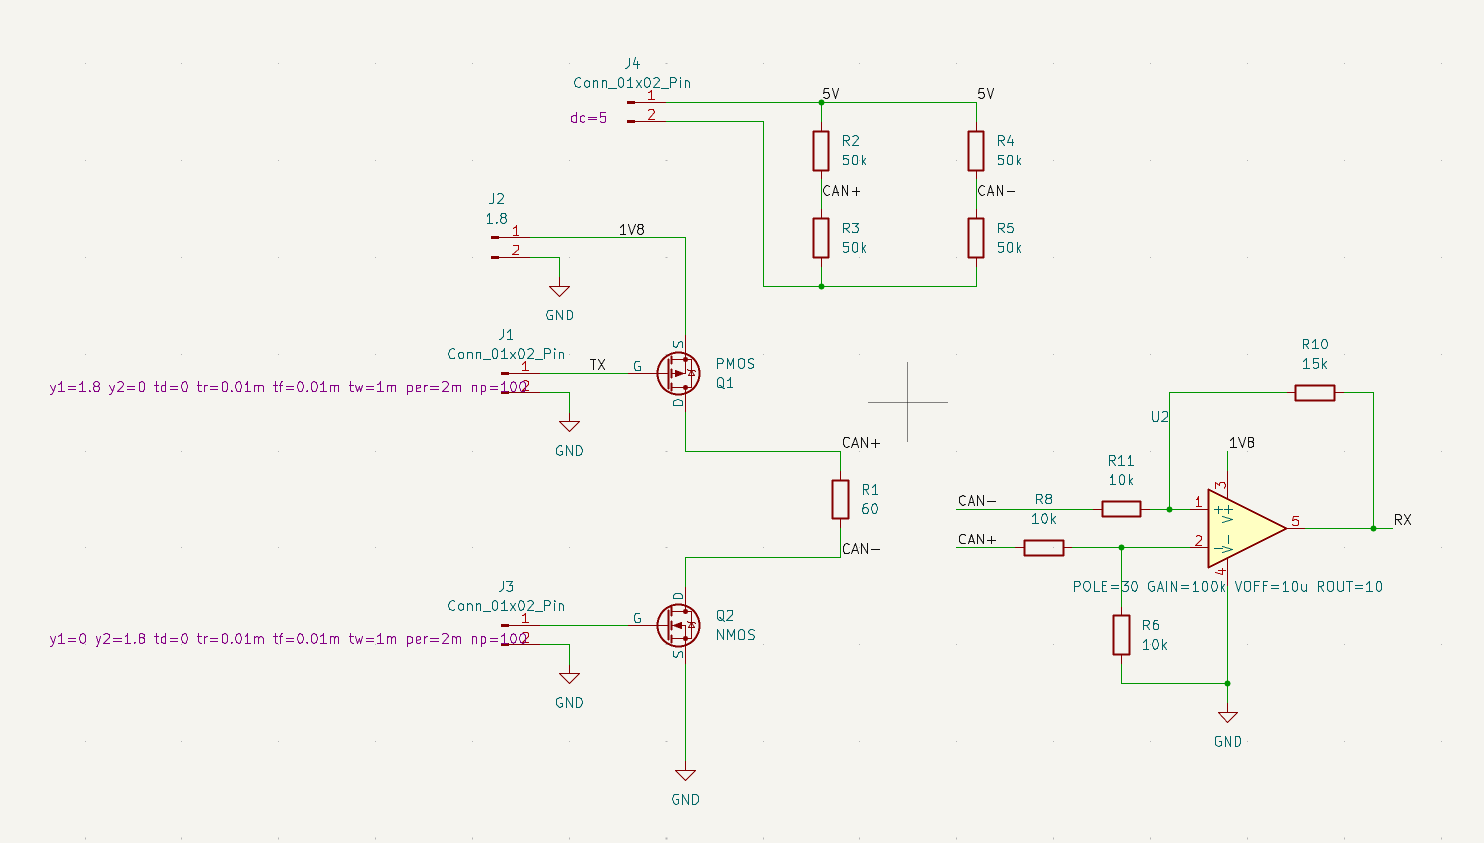

Since our CAN transmitter operates solely on a 1.8 V power supply, it relies on the 5 V CAN node present on the same bus to establish the 2.5 V common-mode voltage through the voltage divider network. In essence, the circuit design remains identical to the previous 5 V configuration — the only differences are the replacement of the 5 V supply with 1.8 V, and the TX signal levels being adjusted accordingly to 1.8 V logic.

In [6]:
!cat can_ic_1V8_all.cir

.title KiCad schematic

* --- Built-in OpAmp model from KiCad (self-contained) ---
* Simple generic model for a single-pole OpAmp
* Parameters are pole frequency, gain, offset, output resistance.
* The output is limited to the supply voltage.
* Author Holger Vogt, Public Domain
.subckt kicad_builtin_opamp in+ in- vcc vee out params: POLE=20 GAIN=20k VOFF=10m ROUT=10
* add offset voltage
  Voff in+ inoff dc {VOFF}
* gain stage with RC pole
  G10 0 int inoff in- 100u
  R1 int 0 {GAIN/100u}
  C1 int 0 {1/(6.28*(GAIN/100u)*POLE)}
* output decoupling, output resistance
  Eout 2 0 int 0 1
  Rout 2 out {ROUT}
* output limited to vee, vcc
  Elow lee 0 vee 0 1
  Ehigh lcc 0 vcc 0 1
  Dlow lee int Dlimit
  Dhigh int lcc Dlimit
  .model Dlimit D N=0.01
.ends kicad_builtin_opamp
* --- End of embedded OpAmp model ---

.model __Q1 VDMOS PCHAN
+           vto=1.5
+           kp=0.68
.model __Q2 VDMOS NCHAN
+           vto=1.5
+           kp=1.36
VJ4 /5V Net-_J4-Pin_2_ DC 5 
R4 /5V /CAN- 50k
R5 /CAN- 

In [7]:
!ngspice -b can_ic_1V8_all.cir


Note: No compatibility mode selected!


Circuit: KiCad schematic

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
Note: Starting dynamic gmin stepping
Note: Dynamic gmin stepping completed

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
/5v                                    4.29992
net-_j4-pin_2_                       -0.700081
/can-                                  1.79993
/can+                                  1.79991
/tx                                        1.8
/1v8                                       1.8
net-_j3-pin_1_                               0
net-_u2-+_                             1.80233
/rx                                    1.80593
net-_u2--_                            0.899956
xu2.inoff                              1.80232
xu2.int                                1.80593
xu2.2                                  1.80593

Parsed 464 data points
Time range: 0.000000 to 0.010000 seconds


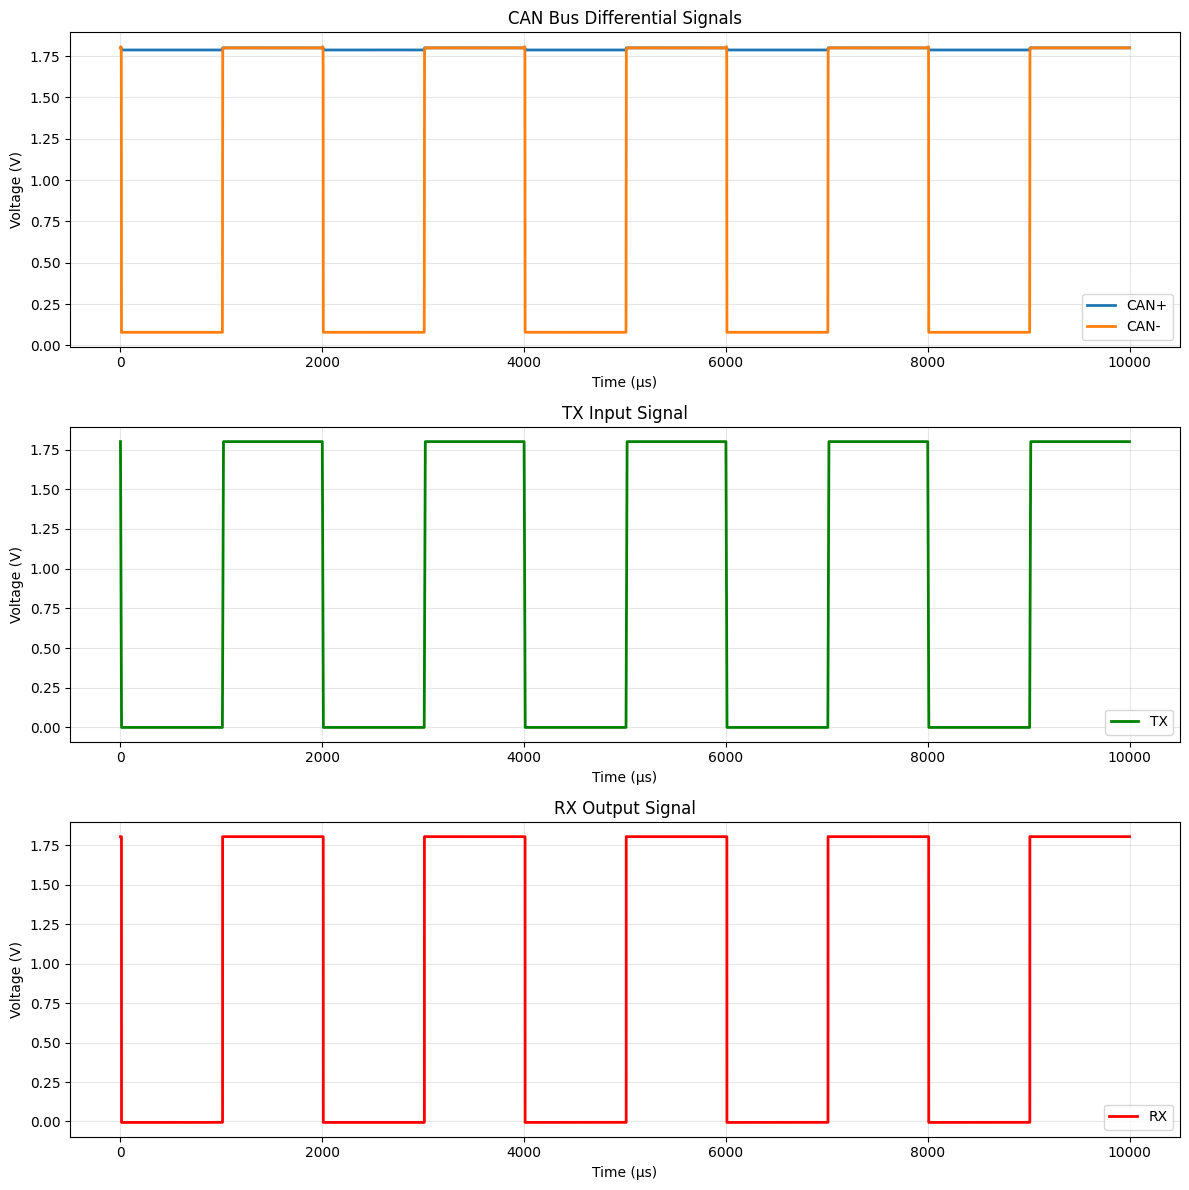

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Parse output
time = []
can_plus = []
can_minus = []
tx = []
rx = []

with open('output.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        if not line or 'Index' in line or '---' in line:
            continue
        
        parts = line.split()
        if len(parts) >= 5:
            try:
                idx = int(parts[0])
                time_val = float(parts[1])
                cp_val = float(parts[2])
                cm_val = float(parts[3])
                tx_val = float(parts[4])
                rx_val = float(parts[5]) if len(parts) > 5 else 0
                
                time.append(time_val)
                can_plus.append(cp_val)
                can_minus.append(cm_val)
                tx.append(tx_val)
                rx.append(rx_val)
            except (ValueError, IndexError):
                continue

print(f"Parsed {len(time)} data points")
if len(time) > 0:
    print(f"Time range: {min(time):.6f} to {max(time):.6f} seconds")

# Plot
if len(time) > 0:
    time_us = np.array(time) * 1e6  # Convert to microseconds
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
    
    # CAN Bus signals
    ax1.plot(time_us, can_plus, label='CAN+', linewidth=2)
    ax1.plot(time_us, can_minus, label='CAN-', linewidth=2)
    ax1.set_xlabel('Time (μs)')
    ax1.set_ylabel('Voltage (V)')
    ax1.set_title('CAN Bus Differential Signals')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # TX signal
    ax2.plot(time_us, tx, label='TX', linewidth=2, color='green')
    ax2.set_xlabel('Time (μs)')
    ax2.set_ylabel('Voltage (V)')
    ax2.set_title('TX Input Signal')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # RX signal
    ax3.plot(time_us, rx, label='RX', linewidth=2, color='red')
    ax3.set_xlabel('Time (μs)')
    ax3.set_ylabel('Voltage (V)')
    ax3.set_title('RX Output Signal')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot. Check output.txt file.")

After going through the explanation above, you should now have a basic understanding of how a CAN transceiver operates. Next, let’s move on to creating the circuit schematic using Xschem and the Sky130 PDK.

# Circuit Schematic

## Model Construction

Transceiver design:

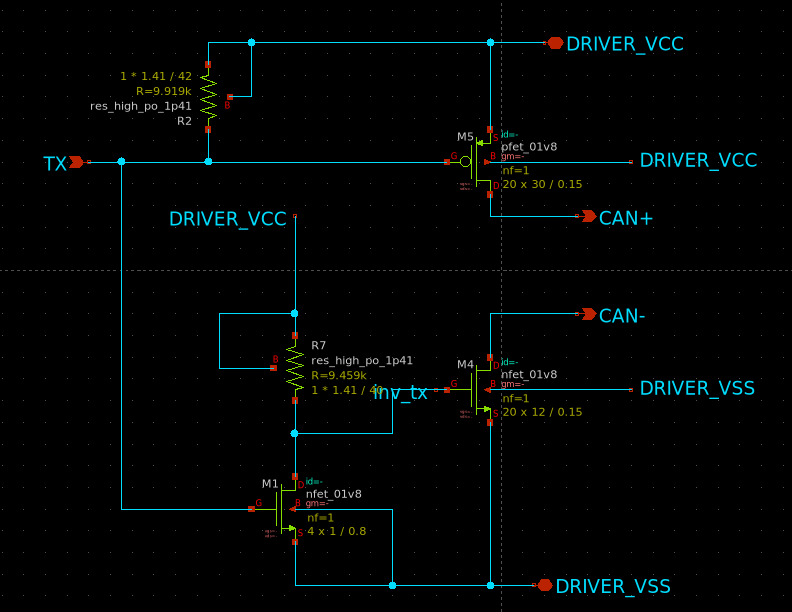

This circuit is basically a recreation of the previous design, but built in xschem using Sky130 PDK cells. The resistor R2 acts as a pull-up resistor, so when the TX line is disconnected, it stays at logic high — representing the recessive state. In this state, both MOSFETs are turned off to save power and avoid interfering with the bus. The PMOS and NMOS are placed the same way as before, but their width, length, and multiplier values are increased significantly so they can drive at least 33.33 mA, as mentioned earlier. The NMOS M1 and resistor R7 together form a simple digital inverter, where TX serves as the input and the inverter output drives the gate of the NMOS.

Receiver design:

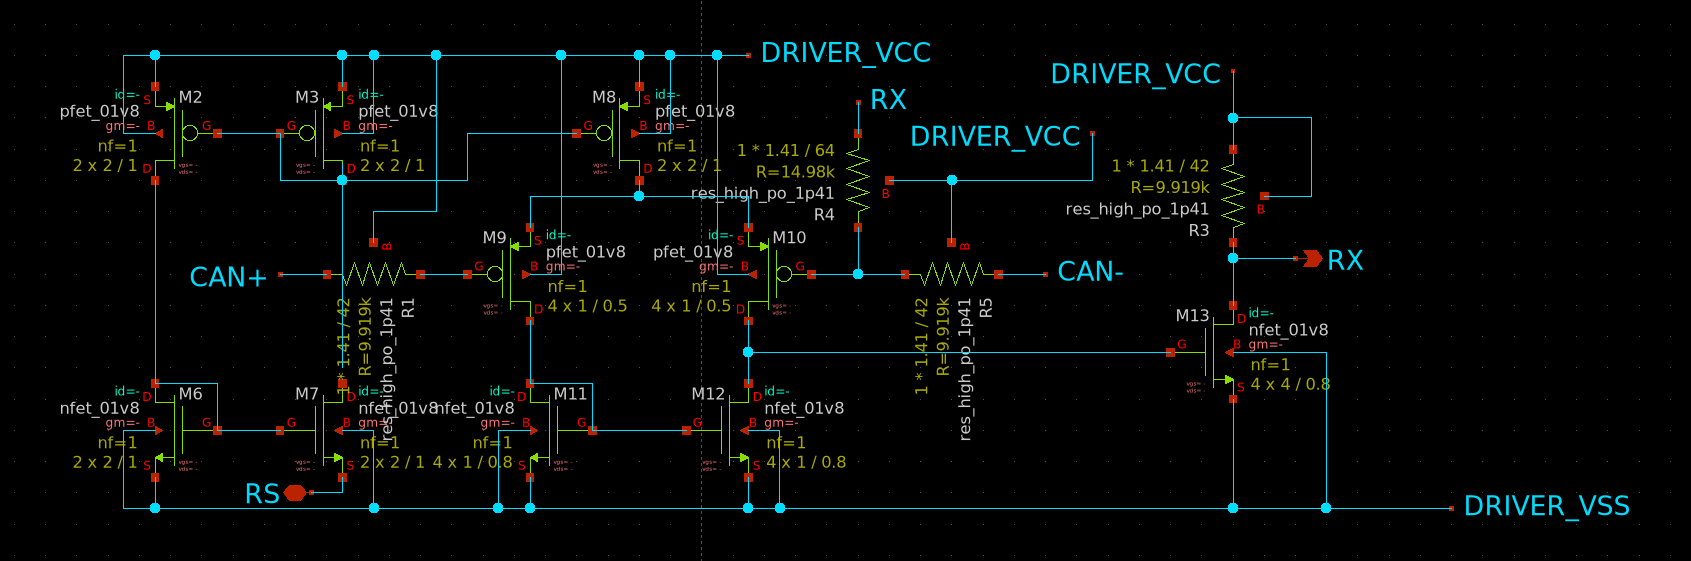

Prebuilt operational amplifier design:

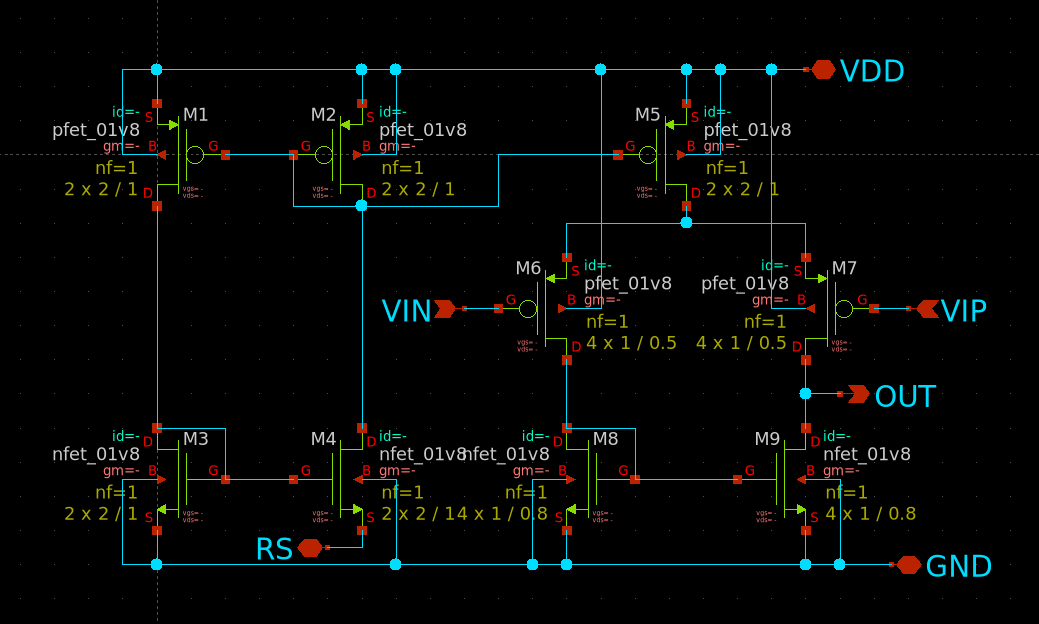

We used the operational amplifier design from (https://github.com/mtfir/sky130-opamp/blob/main/integration/xschem/opamp.sch). To make it work properly in our circuit, we added R1, R4, and R5 as biasing resistors for the op-amp. The components R3 and M13 form an inverter that flips the output signal from the op-amp. Since CAN+ is connected to the non-inverting input and CAN− to the inverting input, the op-amp outputs a logic high when there is a voltage difference between the two lines. However, in our design, we need the opposite behavior — a logic low when there is a voltage difference (dominant state) and a logic high when there isn’t (recessive state). To achieve this, we added the inverter to produce the correct output logic.

Testbench:

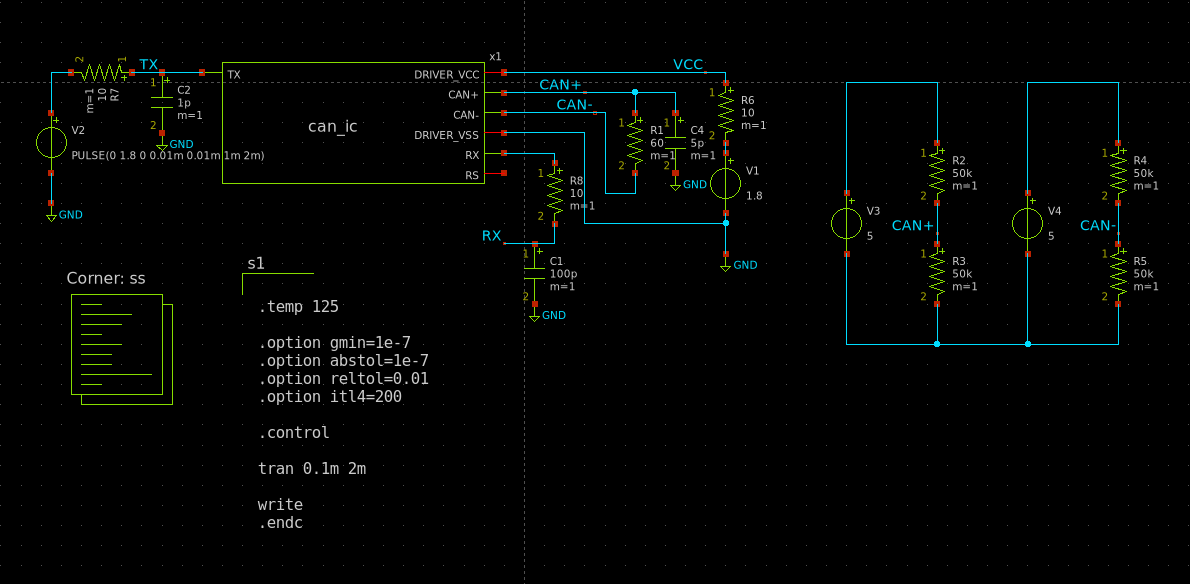


Xschem files location:
- CAN Transceiver IC - xschem/can_ic/can_ic.sch  
- Generated CAN Transceiver IC symbol - xschem/can_ic/can_ic.sym
- Testbench - xschem/can_ic/can_ic_tb.sch

Let's try to run them and see the results!

In [16]:
# generate netlist for can_ic and it's testbench
!mkdir -p simulation
!PDK=sky130A xschem -n -s -q -x --tcl "set netlist_dir $(pwd)/simulation" xschem/can_ic/can_ic.sch
!PDK=sky130A xschem -n -s -q -x --tcl "set netlist_dir $(pwd)/simulation; append XSCHEM_LIBRARY_PATH :$(pwd)/xschem/can_ic" xschem/can_ic/can_ic_tb.sch
!ls -alt simulation/

Using run time directory XSCHEM_SHAREDIR = /foss/tools/xschem/share/xschem
Sourcing /foss/tools/xschem/share/xschem/xschemrc init file
Sourcing /headless/.xschem/xschemrc init file
open_pdks installation: using /foss/pdks
SKYWATER_MODELS: /foss/pdks/sky130A/libs.tech/combined
SKYWATER_STDCELLS: /foss/pdks/sky130A/libs.ref/sky130_fd_sc_hd/spice
setup_tcp_bespice: success : listening to TCP port: 2022

Using run time directory XSCHEM_SHAREDIR = /foss/tools/xschem/share/xschem
Sourcing /foss/tools/xschem/share/xschem/xschemrc init file
Sourcing /headless/.xschem/xschemrc init file
open_pdks installation: using /foss/pdks
SKYWATER_MODELS: /foss/pdks/sky130A/libs.tech/combined
SKYWATER_STDCELLS: /foss/pdks/sky130A/libs.ref/sky130_fd_sc_hd/spice
setup_tcp_bespice: success : listening to TCP port: 2022

total 12
drwxr-xr-x. 1 designer designers   54 Nov  2 14:57 .
-rw-r--r--. 1 designer designers 4738 Nov  2 14:57 can_ic_tb.spice
-rw-r--r--. 1 designer designers 3909 Nov  2 14:57 can_ic.spice

In [17]:
!cat simulation/can_ic_tb.spice

** sch_path: /foss/designs/can_ic_v3/jupyter/xschem/can_ic/can_ic_tb.sch
**.subckt can_ic_tb
V1 net6 GND 1.8
R1 CAN+ CAN- 60 m=1
V3 net1 net2 5
R2 net1 CAN+ 50k m=1
R3 CAN+ net2 50k m=1
V4 net3 net2 5
R4 net3 CAN- 50k m=1
R5 CAN- net2 50k m=1
V2 net4 GND PULSE(0 1.8 0 0.01m 0.01m 1m 2m)
R6 VCC net6 10 m=1
R7 TX net4 10 m=1
R8 net5 RX 10 m=1
C1 RX GND 100p m=1
C2 TX GND 1p m=1
C4 CAN+ GND 5p m=1
x1 VCC TX CAN+ CAN- GND net5 net7 can_ic
**** begin user architecture code
.lib /foss/pdks/sky130A/libs.tech/combined/sky130.lib.spice ss


.temp 125

.option gmin=1e-7
.option abstol=1e-7
.option reltol=0.01
.option itl4=200

.control

tran 0.1m 2m

write
.endc


**** end user architecture code
**.ends

* expanding   symbol:  can_ic.sym # of pins=7
** sym_path: /foss/designs/can_ic_v3/jupyter/xschem/can_ic/can_ic.sym
** sch_path: /foss/designs/can_ic_v3/jupyter/xschem/can_ic/can_ic.sch
.subckt can_ic DRIVER_VCC TX CAN+ CAN- DRIVER_VSS RX RS
*.iopin DRIVER_VCC
*.iopin DRIVER_VSS
*.ipin TX
*.opin

In [8]:
!ngspice -b simulation/can_ic_tb.spice


Note: No compatibility mode selected!


Circuit: ** sch_path: /foss/designs/can_ic_v3/jupyter/xschem/can_ic/can_ic_tb.sch

Doing analysis at TEMP = 125.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver

Checking parameters for BSIM 4.5 model x1.xm7:nshort_model.29

Checking parameters for BSIM 4.5 model x1.xm6:nshort_model.29

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
net6                                       1.8
can+                                    1.4018
can-                                  0.128962
net1                                   3.26538
net2                                  -1.73462
net3                                   3.26538
net4                                         0
vcc                                    1.58465
tx                                  0.00151247
net5                                 0.0997667
rx                             

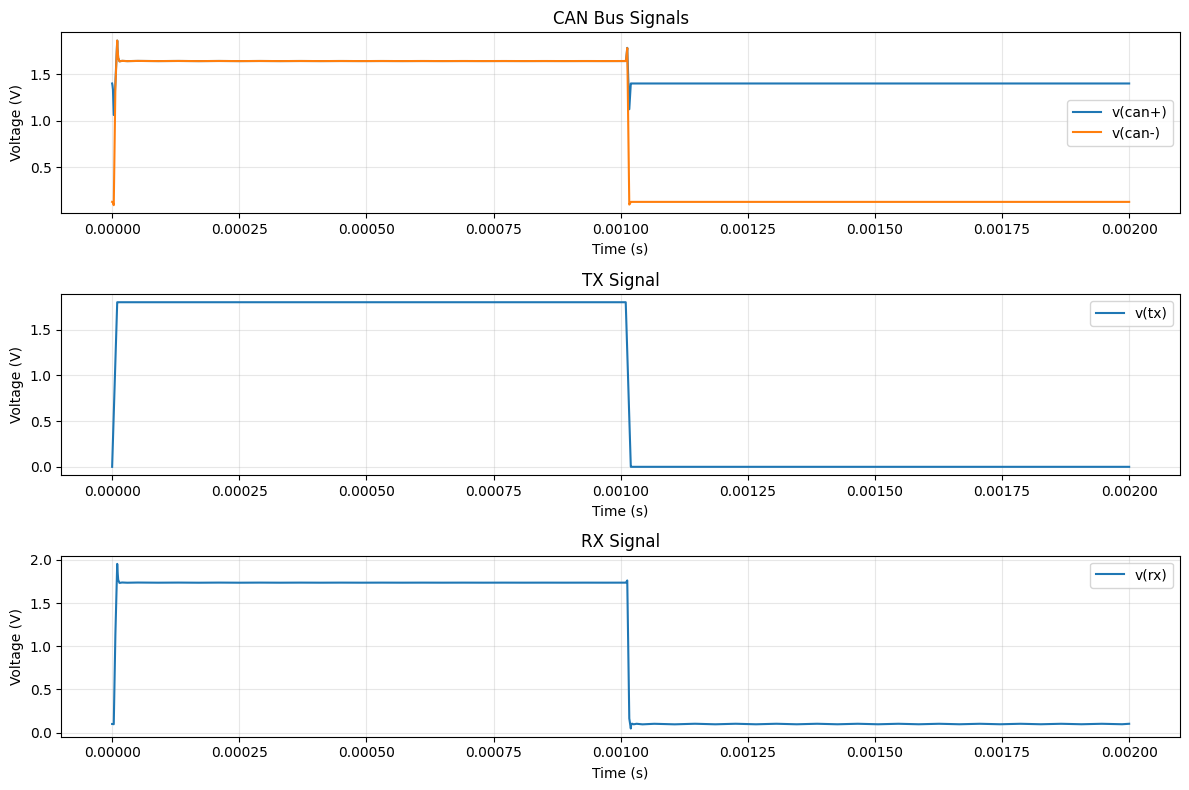

In [9]:
#!/usr/bin/env python3
"""
Plot ngspice simulation results in Jupyter notebook
"""

import matplotlib.pyplot as plt
import numpy as np

def read_ngspice_raw(filename):
    """
    Read ngspice binary raw file
    Returns: data dictionary with variable names as keys
    """
    plot = {}
    with open(filename, 'rb') as fp:
        # Read header
        for line in fp:
            try:
                line_str = line.decode('utf-8', errors='ignore').strip()
            except:
                break
                
            if ':' in line_str:
                key, value = line_str.split(':', 1)
                key = key.strip().lower()
                value = value.strip()
                plot[key] = value
                
                # Parse variables section
                if key == 'variables':
                    nvars = int(plot['no. variables'])
                    npoints = int(plot['no. points'])
                    varnames = []
                    
                    for _ in range(nvars):
                        varline = fp.readline().decode('utf-8', errors='ignore').strip().split()
                        varnames.append(varline[1].lower())
                    
                    plot['varnames'] = varnames
                    
                # Binary data starts after this line
                if key == 'binary':
                    # Determine data type based on flags
                    if 'complex' in plot.get('flags', ''):
                        dtype = np.complex128
                    else:
                        dtype = np.float64
                    
                    # Read binary data
                    rowdtype = np.dtype([(name, dtype) for name in varnames])
                    data = np.fromfile(fp, dtype=rowdtype, count=npoints)
                    
                    # Convert to dictionary
                    result = {}
                    for name in varnames:
                        result[name] = data[name]
                    
                    return result
    
    return None

def plot_signals(raw_file, signals_dict, figsize=(12, 8)):
    """
    Plot signals from ngspice raw file
    
    Parameters:
    -----------
    raw_file : str
        Path to the .raw file
    signals_dict : dict
        Dictionary where keys are plot titles and values are lists of signal names
        Example: {'CAN Bus': ['v(can+)', 'v(can-)'], 'TX': ['v(tx)'], 'RX': ['v(rx)']}
    figsize : tuple
        Figure size (width, height)
    """
    # Read the raw file
    data = read_ngspice_raw(raw_file)
    
    if data is None:
        print(f"Error: Could not read {raw_file}")
        return
    
    # Get time vector
    time = data.get('time', data.get('frequency', None))
    if time is None:
        print("Error: No time/frequency vector found")
        return
    
    # Create subplots
    n_plots = len(signals_dict)
    fig, axes = plt.subplots(n_plots, 1, figsize=figsize, squeeze=False)
    axes = axes.flatten()
    
    # Plot each group of signals
    for idx, (title, signals) in enumerate(signals_dict.items()):
        ax = axes[idx]
        
        for signal in signals:
            signal_lower = signal.lower()
            if signal_lower in data:
                # Handle complex data
                if np.iscomplexobj(data[signal_lower]):
                    ax.plot(time, np.abs(data[signal_lower]), label=f'{signal} (magnitude)')
                else:
                    ax.plot(time, data[signal_lower], label=signal)
            else:
                print(f"Warning: Signal '{signal}' not found in raw file")
                print(f"Available signals: {list(data.keys())}")
        
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Voltage (V)')
        ax.set_title(title)
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage in Jupyter notebook:
if __name__ == "__main__":
    # Define what to plot
    plots = {
        'CAN Bus Signals': ['v(can+)', 'v(can-)'],
        'TX Signal': ['v(tx)'],
        'RX Signal': ['v(rx)']
    }
    
    # Plot the results
    plot_signals('rawspice.raw', plots)

Ok, we can observe that the signals looks expected. Maybe the voltage difference during dominant state is not that high compare to previous simulation, as it need a really high ratio of width to length for the mosfet to get that high drain current. But this voltage is enough to be notices by the op amp, so it should be ok to proceed.
The simulation results show that the signals behave as expected. Although the voltage difference during the dominant state is slightly lower compared to the previous simulation, due to the high width-to-length ratio required for the MOSFET to achieve larger drain current, the voltage is sufficient to be reliably detected by the operational amplifier. Therefore, the design is suitable to proceed to further testing.

## Layout

The layout of the transceiver was implemented in Magic VLSI using the SkyWater SKY130 PDK. We focused on ensuring that all device connections, metal routing, and layer assignments were correctly represented according to the schematic.

We successfully performed **Design Rule Checks (DRC)** to verify that the layout conforms to the process design rules. However, due to time constraints, **Layout Versus Schematic (LVS)** verification was not completed, and the layout may still contain mismatches compared to the schematic. Completing LVS verification remains a future step to fully validate the physical design against the intended circuit.


In [9]:
# python script to check drc
!export PDKPATH=/foss/pdks/sky130A && \
export STD_CELL_LIBRARY=sky130_fd_sc_hd && \
python /foss/pdks/sky130A/libs.tech/magic/run_standard_drc.py magic/can_backup.gds

Evaluating full DRC results for layout magic/can_backup
Running: magic -dnull -noconsole -rcfile /foss/pdks/sky130A/libs.tech/magic/sky130A.magicrc /foss/designs/can_ic_v3/jupyter/run_magic_drc_can_backup.tcl
Running in directory: /foss/designs/can_ic_v3/jupyter

Magic 8.3 revision 554 - Compiled on Tue Sep 30 09:49:01 PM CEST 2025.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Loading "/foss/designs/can_ic_v3/jupyter/run_magic_drc_can_backup.tcl" from command line.
DRC style is now "drc(full)"
Library written using GDS-II Release 3.0
Library name: can_backup
Reading

In [10]:
# python script to check for antenna rule violation, original file is at /foss/pdks/sky130A/libs.tech/magic/check_antenna.py, but it reports error saying it needs to include glob library, so we moved it here and added "import glob"

!export PDKPATH=/foss/pdks/sky130A && \
export STD_CELL_LIBRARY=sky130_fd_sc_hd && \
python check_antenna.py magic/can_backup.gds

Evaluating antenna rule violations on layout magic/can_backup
Running: magic -dnull -noconsole

Magic 8.3 revision 554 - Compiled on Tue Sep 30 09:49:01 PM CEST 2025.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Loading "run_magic_antenna.tcl" from command line.
Cell can_backup read from path magic
Cell integration read from path magic/sky130-opamp/integration/mag
Cell block4 read from path magic/sky130-opamp/integration/mag/./
Cell sky130_fd_pr__nfet_01v8_V6EN4H read from path magic/sky130-opamp/integration/mag/./
Cell sky130_fd_pr__nfet_01v8_FZ7FED read from path 

In [11]:
# python script to check 
!export PDKPATH=/foss/pdks/sky130A && \
export STD_CELL_LIBRARY=sky130_fd_sc_hd && \
python /foss/pdks/sky130A/libs.tech/magic/generate_fill.py magic/can_backup.gds

This script will generate files can_backup_fill_pattern_x_y.gds
Now generating fill patterns.  This may take. . . quite. . . a while.

Magic 8.3 revision 554 - Compiled on Tue Sep 30 09:49:01 PM CEST 2025.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Input style default: scaleFactor=1, multiplier=1
The following types are not handled by extraction and will be treated as non-electrical types:
    NWELL NWELLP DNWELL DIFF THKOX POLY POLYP PSD NSD CONT MET1 MET1T MET1P VIA1 MET2 MET2T MET2P VIA2 MET3 MET3T MET3P VIA3 MET4 MET4T MET4P VIA4 MET5 MET5T MET5P VIA5 MET6 MET6T MET6P VIA6 MET7 MET7T MET7P PAD PADP TEXT SBLK PNP NPN CAP IND POLYRES DIODE SUBS SUBST BOUND 
Processing system .magicrc file
Sourcing design .magicrc for technology ihp-sg13g2 ...
2 Magic internal units = 1 Lambda
Error message output from magic:
/foss/pdks/ihp-sg13g2/libs.tech/magic/ihp-sg13g2-GDS.tech: line 222: section cifoutput:
	Unrecognized layer (type) "NWELL

## Layout Images

Full image:

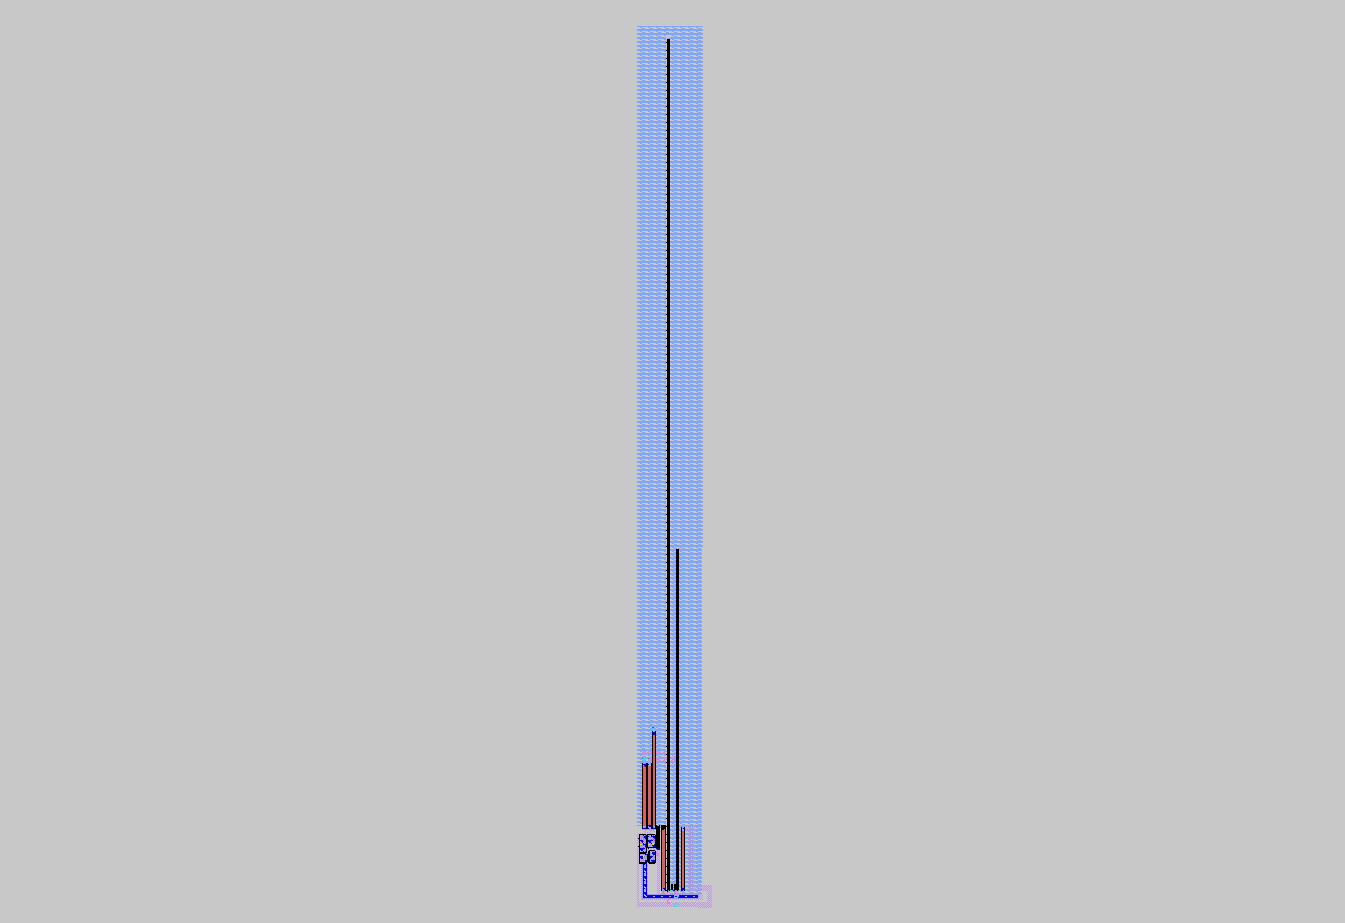

The longest device in the layout is the M5 PMOS transistor, followed by the M4 NMOS. Both transistors were designed with extended channel widths to allow higher drain current, which is necessary to achieve the required differential voltage on the bus.


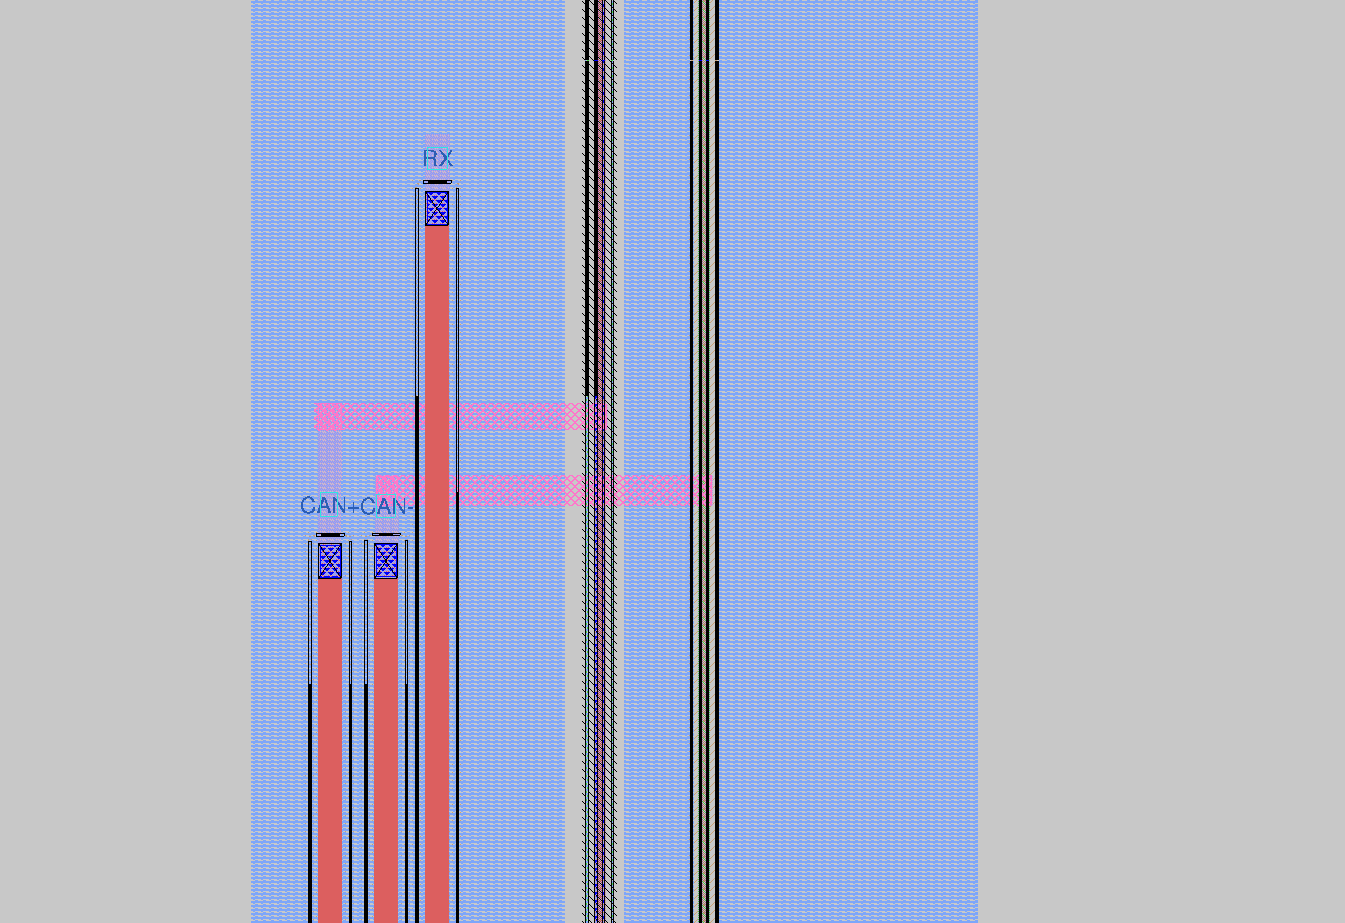

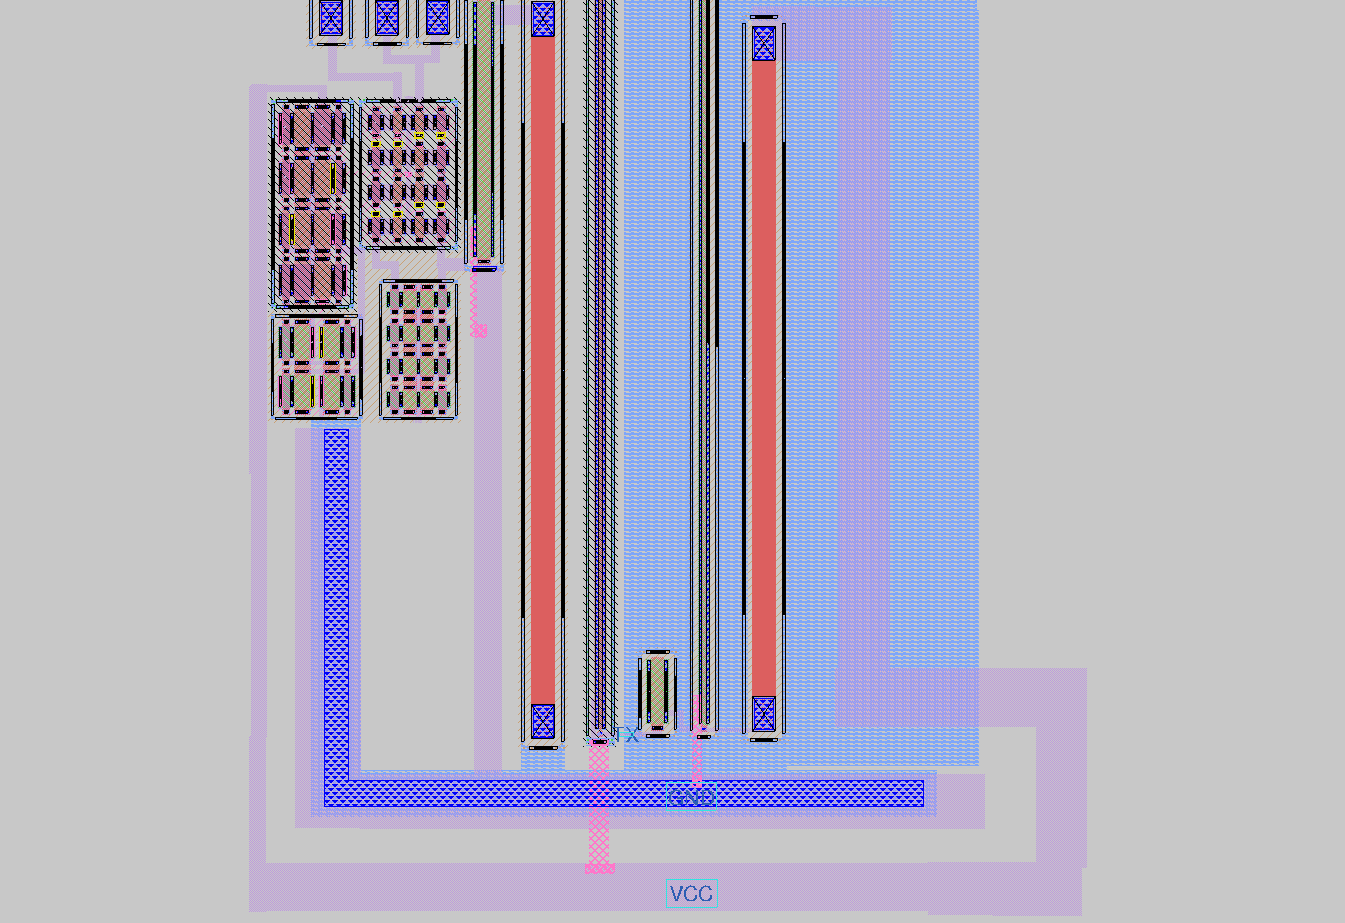
